# **MidTerm Project Visualisasi Data**

Naufal Haritsah Luthfi   - 1301194073

>
>

**Library Yang Digunakan :**

1. Pandas, sebagai alat bantu statistik dalam pengolahan data
2. Seaborn, sebagai library tambahan dalam visualisasi data
3. Numpy, sebagai alat bantu operasi komputasi tipe data numerik
4. Matplotlib, sebagai library tambahan dalam visualisasi data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Data Set 1**
**Deskripsi Data :**

Data set ini terdiri dari data historis terkait dengan kasus COVID-19 di Indonesia pada 
periode 2 – 31 Maret 2020. Data historis yang tersedia di antaranya jumlah akumulatif 
tes sampel, terkonfirmasi positif, terkonfirmasi negatif, dan data lainnya.

In [ ]:
!gdown --id 1nWcdNzhXAp87PkjsGmv0rYJzopMzgs58

Downloading...
From: https://drive.google.com/uc?id=1nWcdNzhXAp87PkjsGmv0rYJzopMzgs58
To: /content/Data_Set_1.csv
100% 1.15k/1.15k [00:00<00:00, 4.85MB/s]


## **Jawaban Pertanyaan**

### **Pengecekan Data**

In [ ]:
data1 = pd.read_csv('Data_Set_1.csv')

In [ ]:
data1.isnull().sum()

date             0
new_tested       0
acc_tested       0
new_confirmed    0
acc_confirmed    0
acc_negative     0
being_checked    0
isolated         0
dtype: int64

In [ ]:
data1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


In [ ]:
data1.tail()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
25,27-Mar-20,1439,5775,153,1046,4729,0,913
26,28-Mar-20,491,6266,109,1155,5111,0,994
27,29-Mar-20,268,6534,130,1285,5249,0,1107
28,30-Mar-20,129,6663,129,1414,5249,0,1217
29,31-Mar-20,114,6777,114,1528,5249,0,1311


###**Soal 1**
Dengan menggunakan line plot, tampilkan perbandingan jumlah akumulatif tes sampel, 
terkonfirmasi positif dan terkonfirmasi negatif untuk periode waktu yang tersedia.

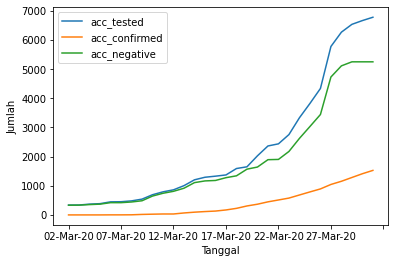

In [ ]:
data1.plot(x='date',y=['acc_tested','acc_confirmed', 'acc_negative'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.show()

###**Soal 2**

*   Hitunglah nilai positive rate dan negative rate untuk masing-masing waktu

In [ ]:
data1['Positivity_Rate'] = data1['acc_confirmed'] / data1['acc_tested'] * 100
data1['Negativity_Rate'] = data1['acc_negative'] / data1['acc_tested'] * 100
data1.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,Positivity_Rate,Negativity_Rate
0,02-Mar-20,339,339,2,2,335,2,2,0.589971,98.820059
1,03-Mar-20,2,341,0,2,337,2,2,0.586510,98.826979
2,04-Mar-20,31,372,0,2,356,14,2,0.537634,95.698925
3,05-Mar-20,16,388,0,2,371,15,2,0.515464,95.618557
4,06-Mar-20,62,450,2,4,422,24,4,0.888889,93.777778


*   Dengan menggunakan bar plot, tampilkan perbandingan positivity rate dan dan negativity rate untuk periode waktu yang tersedia

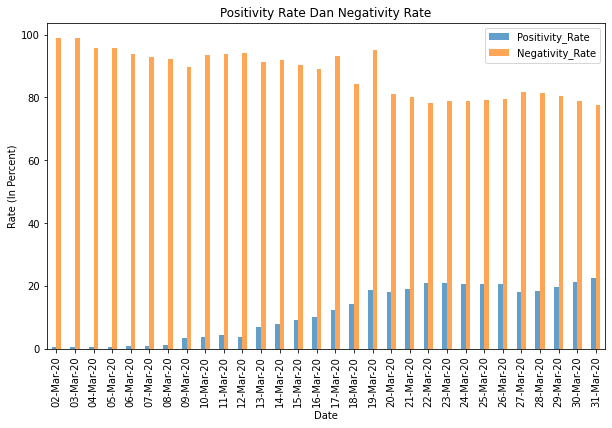

In [ ]:
data1.plot(x="date", y=["Positivity_Rate", "Negativity_Rate"],
          kind ='bar', 
          figsize=(10, 6),
          alpha=0.7,
          )

plt.title('Positivity Rate Dan Negativity Rate')
plt.ylabel('Rate (In Percent)')
plt.xlabel('Date')
plt.show()

*    Pada tanggal berapa nilai positive rate menunjukkan nilai tertinggi?

In [ ]:
tinggi_positive = data1['Positivity_Rate'].max()
data1.loc[data1['Positivity_Rate'] == tinggi_positive, 'date']

29    31-Mar-20
Name: date, dtype: object

Nilai Positive Rate tertinggi terjadi pada tanggal 31 Maret 2020

*    Pada tanggal berapa nilai negative rate menunjukkan nilai tertinggi?

In [ ]:
tinggi_negative = data1['Negativity_Rate'].max()
data1.loc[data1['Negativity_Rate'] == tinggi_negative, 'date']

1    03-Mar-20
Name: date, dtype: object

Nilai Negative Rate tertinggi terjadi pada tanggal 3 Maret 2020

###**Soal 3**

*   Dengan menggunakan heatmap, tunjukkan korelasi antar variabel yang ada pada 
dataset.

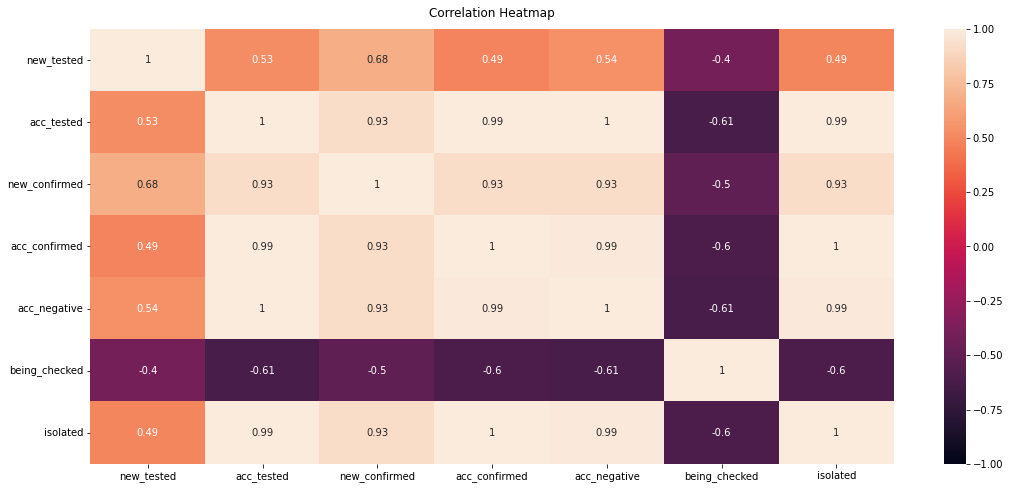

In [ ]:
data1 = data1.drop(['Positivity_Rate', 'Negativity_Rate'], axis=1)
plt.figure(figsize=(18,8))
heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

*   Tentukan variabel-variabel yang memiliki nilai korelasi paling positif, dan berikan penjelasan terkait nilai korelasi tersebut.
  1. acc_tested memiliki korelasi yang sangat kuat terhadap acc_negative dengan nilai korelasi positif sebesar 1. Ketika variabel acc_tested bertambah maka variabel acc_negative juga akan bertambah dan sebaliknya, karena kedua variabel tersebut memiliki korelasi yang sangat kuat
  2. isolated memiliki korelasi yang sangat kuat terhadap acc_confirmed dengan nilai korelasi positif sebesar 1. Ketika variabel isolated bertambah maka variabel acc_confirmed juga akan bertambah dan sebaliknya, karena kedua variabel tersebut memiliki korelasi yang sangat kuat

*   Tentukan variabel-variabel yang memiliki nilai korelasi paling negatif, dan berikan penjelasan terkait nilai korelasi tersebut.
  1. being_checked memiliki korelasi yang kuat terhadap acc_tested dengan nilai korelasi negatif sebesar -0.61. Ketika variabel acc_tested bertambah maka variabel being_checked akan berkurang yang artinya kedua variabel tersebut bertolak belakang
  2. being_checked memiliki korelasi yang kuat terhadap acc_negative dengan nilai korelasi negatif sebesari -0.61. Ketika variabel acc_negative bertambah maka variabel being_checked akan berkurang yang artinya kedua variabel tersebut bertolak belakang

# **Data Set 2**
**Deskripsi Data :**

Data set ini menyajikan data spasial terkait kasus COVID-19 di masing-masing provinsi di Indonesia. Data yang disajikan di antaranya jumlah populasi, jumlah kasus positif, dan 
lain-lain.

## **Jawaban Pertanyaan**

In [ ]:
!gdown --id 1O4aaN2tLLhGwiRpjEhiMCovpQqQMP4JC

Downloading...
From: https://drive.google.com/uc?id=1O4aaN2tLLhGwiRpjEhiMCovpQqQMP4JC
To: /content/Data_Set_2.csv
100% 2.82k/2.82k [00:00<00:00, 6.89MB/s]


### **Pengecekan Data**

In [ ]:
data2 = pd.read_csv('Data_Set_2.csv')

In [ ]:
data2.isnull().sum()

province_id            0
province_name          0
island                 0
iso_code               0
capital_city           0
population             0
population_kmsquare    0
confirmed              0
deceased               0
released               0
longitude              0
latitude               0
dtype: int64

In [ ]:
data2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [ ]:
data2.tail()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
29,30,Sulawesi Tenggara,Sulawesi,SG,Kendari,2448081,67,3,0,0,121.959.229,-3.697.078
30,31,Sulawesi Utara,Sulawesi,SA,Manado,2386604,171,2,0,0,124.725.037,1.277.055
31,32,Sumatra Barat,Sumatra,SB,Padang,5131900,121,5,0,0,100.118.408,-0.186767
32,33,Sumatra Selatan,Sumatra,SS,Palembang,7941500,93,1,0,0,104.710.693,-3.107.606
33,34,Sumatra Utara,Sumatra,SU,Medan,13766851,189,8,1,0,98.712.158,323.924


###**Soal 4**
*   Hitunglah nilai persentase perbandingan jumlah terkonfirmasi positif terhadap 
populasi per km2 untuk masing-masing provinsi.



In [ ]:
data2['Positive_Rate'] = data2['confirmed'] / data2['population_kmsquare'] * 100
data2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,Positive_Rate
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


*   Dengan menggunakan bar plot, tampilkan perbandingan nilai persentase tersebut 
untuk masing-masing provinsi.

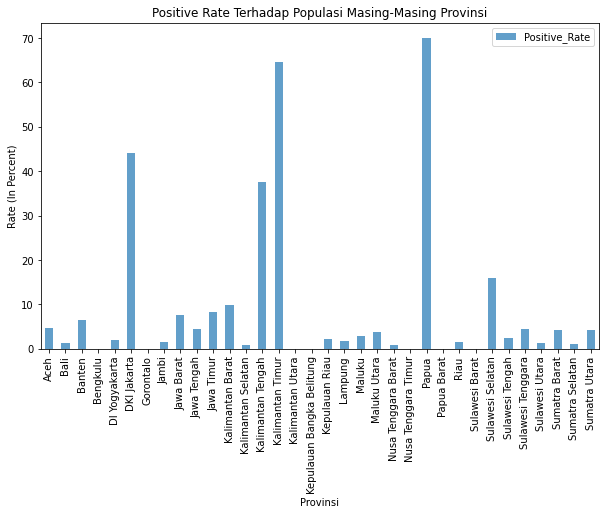

In [ ]:
data2.plot(x="province_name", y="Positive_Rate",
          kind ='bar', 
          figsize=(10, 6),
          alpha=0.7,
          )

plt.title('Positive Rate Terhadap Populasi Masing-Masing Provinsi')
plt.ylabel('Rate (In Percent)')
plt.xlabel('Provinsi')
plt.show()

*   Tampilkan 3 provinsi dengan nilai persentasi terbesar beserta nilai persentasenya.

In [ ]:
data2_tinggi = data2[['province_name', 'Positive_Rate']].sort_values(by=['Positive_Rate'], ascending=False)
data2_tinggi.head(3)

,province_name,Positive_Rate
23,Papua,70.000000
14,Kalimantan Timur,64.705882
5,DKI Jakarta,44.198078


###**Soal 5**
Dengan menggunakan pie chart, tampilkan persentase jumlah terkonfimasi positif untuk masing-masing pulau.

<function matplotlib.pyplot.show>

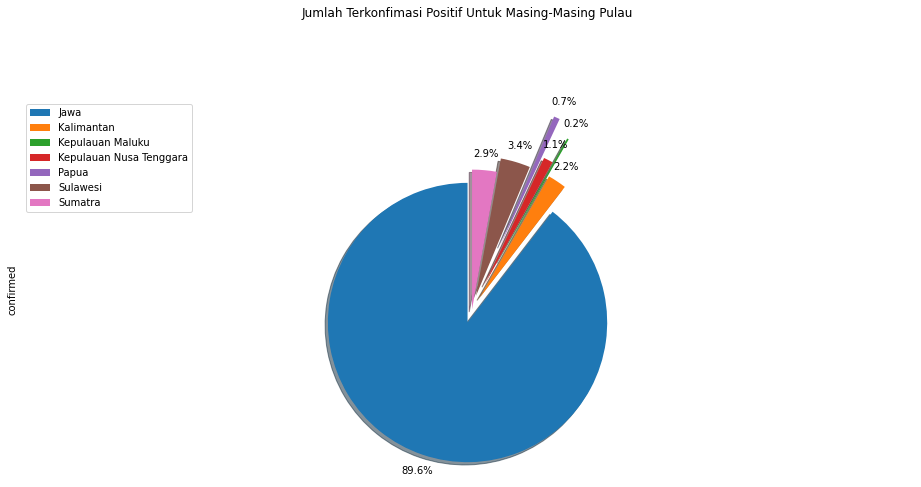

In [ ]:
data2_island = data2.groupby('island', axis=0).sum()
explode_list = [0.1, 0.1, 0.4, 0.2, 0.5, 0.1, 0]
data2_island['confirmed'].plot(kind='pie',
                              figsize=(16, 7),
                              autopct='%1.1f%%',
                              startangle=90,
                              shadow=True,
                              labels=None,
                              pctdistance=1.12,
                              explode=explode_list
                              )
plt.title('Jumlah Terkonfimasi Positif Untuk Masing-Masing Pulau', y=1.2)
plt.axis('equal')
plt.legend(labels=data2_island.index, loc='upper left')
plt.show